<a href="https://colab.research.google.com/github/nrshalahudin/Project2/blob/Project/studikasus_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Studi Kasus Data HR.csv', delimiter=';')
df.head()

,Participant Code,Region,log_berpikir,k_numerikal,d_analisa,k_verbal,o_hasil,fleks,s_kerja,m_prestasi,kerjasama,k_interpersonal,pil_jabatan,prosen_kecocokan,hasil_rekomendasi
0,DCX_001,BALI NUSRA,2,2,3,3,3,3,3,2,3,4,SALES,91.67,Disarankan
1,DCX_002,BALI NUSRA,3,3,3,3,4,4,4,4,5,5,SALES,94.17,Disarankan
2,DCX_003,BALI NUSRA,3,3,4,3,5,3,4,4,5,4,SALES,94.17,Disarankan
3,DCX_004,BALI NUSRA,3,3,3,3,5,4,4,5,5,3,SALES,91.67,Disarankan
4,DCX_005,BALI NUSRA,3,2,3,3,3,3,3,2,4,3,SALES,91.67,Disarankan


In [2]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16354 entries, 0 to 16353
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Participant Code   16354 non-null  object 
 1   Region             13266 non-null  object 
 2   log_berpikir       16354 non-null  int64  
 3   k_numerikal        16354 non-null  int64  
 4   d_analisa          16354 non-null  int64  
 5   k_verbal           16354 non-null  int64  
 6   o_hasil            16354 non-null  int64  
 7   fleks              16354 non-null  int64  
 8   s_kerja            16354 non-null  int64  
 9   m_prestasi         16354 non-null  int64  
 10  kerjasama          16354 non-null  int64  
 11  k_interpersonal    16354 non-null  int64  
 12  pil_jabatan        16354 non-null  object 
 13  prosen_kecocokan   16354 non-null  float64
 14  hasil_rekomendasi  16354 non-null  object 
dtypes: float64(1), int64(10), object(4)
memory usage: 1.9+ MB


Participant Code      object
Region                object
log_berpikir           int64
k_numerikal            int64
d_analisa              int64
k_verbal               int64
o_hasil                int64
fleks                  int64
s_kerja                int64
m_prestasi             int64
kerjasama              int64
k_interpersonal        int64
pil_jabatan           object
prosen_kecocokan     float64
hasil_rekomendasi     object
dtype: object

In [3]:
df['Region'].unique()

array(['BALI NUSRA', 'HEAD OFFICE', 'JAKARTA', 'JAWA BARAT',
       'JAWA TENGAH', 'JAWA TIMUR', 'KALIMANTAN', 'SULAWESI',
       'SUMATERA 1', 'SUMATERA 2', '-', nan], dtype=object)

In [4]:
df.replace('-', np.nan, inplace=True)
df['Region'].unique()

array(['BALI NUSRA', 'HEAD OFFICE', 'JAKARTA', 'JAWA BARAT',
       'JAWA TENGAH', 'JAWA TIMUR', 'KALIMANTAN', 'SULAWESI',
       'SUMATERA 1', 'SUMATERA 2', nan], dtype=object)

In [5]:
df['Region'].fillna('TANPA KETERANGAN', inplace=True)

In [6]:
df['Region'].unique()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16354 entries, 0 to 16353
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Participant Code   16354 non-null  object 
 1   Region             16354 non-null  object 
 2   log_berpikir       16354 non-null  int64  
 3   k_numerikal        16354 non-null  int64  
 4   d_analisa          16354 non-null  int64  
 5   k_verbal           16354 non-null  int64  
 6   o_hasil            16354 non-null  int64  
 7   fleks              16354 non-null  int64  
 8   s_kerja            16354 non-null  int64  
 9   m_prestasi         16354 non-null  int64  
 10  kerjasama          16354 non-null  int64  
 11  k_interpersonal    16354 non-null  int64  
 12  pil_jabatan        16354 non-null  object 
 13  prosen_kecocokan   16354 non-null  float64
 14  hasil_rekomendasi  16354 non-null  object 
dtypes: float64(1), int64(10), object(4)
memory usage: 1.9+ MB


In [7]:
df['Region'] = df['Region'].apply(lambda x: x.lower().replace(' ', '_') if pd.notnull(x) else x)
df['pil_jabatan'] = df['pil_jabatan'].apply(lambda x: x.lower().replace(' ', '_') if pd.notnull(x) else x)

In [8]:
df['Nilai_transformed'] = df['prosen_kecocokan'].apply(lambda x: np.log(x))

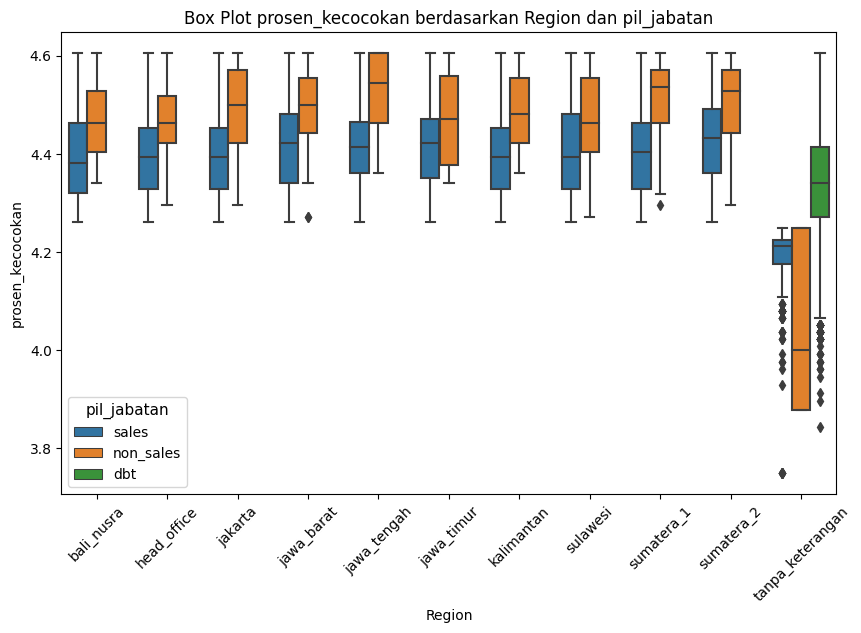

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Nilai_transformed', hue='pil_jabatan')
plt.xlabel('Region')
plt.ylabel('prosen_kecocokan')
plt.title('Box Plot prosen_kecocokan berdasarkan Region dan pil_jabatan')
plt.xticks(rotation=45)
plt.legend(title='pil_jabatan', title_fontsize='11')
plt.show()

In [11]:
value_to_drop = 'tanpa_keterangan'
df = df[df['Region'] != value_to_drop]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 4908
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Participant Code   4909 non-null   object 
 1   Region             4909 non-null   object 
 2   log_berpikir       4909 non-null   int64  
 3   k_numerikal        4909 non-null   int64  
 4   d_analisa          4909 non-null   int64  
 5   k_verbal           4909 non-null   int64  
 6   o_hasil            4909 non-null   int64  
 7   fleks              4909 non-null   int64  
 8   s_kerja            4909 non-null   int64  
 9   m_prestasi         4909 non-null   int64  
 10  kerjasama          4909 non-null   int64  
 11  k_interpersonal    4909 non-null   int64  
 12  pil_jabatan        4909 non-null   object 
 13  prosen_kecocokan   4909 non-null   float64
 14  hasil_rekomendasi  4909 non-null   object 
 15  Nilai_transformed  4909 non-null   float64
dtypes: float64(2), int64(10)

In [13]:
# Metode Z-score untuk mendeteksi nilai pencilan
z_scores = (df['Nilai_transformed'] - df['Nilai_transformed'].mean()) / df['Nilai_transformed'].std()
outliers_z_score = df[abs(z_scores) > 3]

# Metode IQR untuk mendeteksi nilai pencilan
Q1 = df['Nilai_transformed'].quantile(0.25)
Q3 = df['Nilai_transformed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = df[(df['Nilai_transformed'] < lower_bound) | (df['Nilai_transformed'] > upper_bound)]

# Tampilkan nilai pencilan
print("Nilai Pencilan menggunakan Z-score:")
print(outliers_z_score)

print("\nNilai Pencilan menggunakan IQR:")
print(outliers_iqr)

Nilai Pencilan menggunakan Z-score:
Empty DataFrame
Columns: [Participant Code, Region, log_berpikir, k_numerikal, d_analisa, k_verbal, o_hasil, fleks, s_kerja, m_prestasi, kerjasama, k_interpersonal, pil_jabatan, prosen_kecocokan, hasil_rekomendasi, Nilai_transformed]
Index: []

Nilai Pencilan menggunakan IQR:
Empty DataFrame
Columns: [Participant Code, Region, log_berpikir, k_numerikal, d_analisa, k_verbal, o_hasil, fleks, s_kerja, m_prestasi, kerjasama, k_interpersonal, pil_jabatan, prosen_kecocokan, hasil_rekomendasi, Nilai_transformed]
Index: []


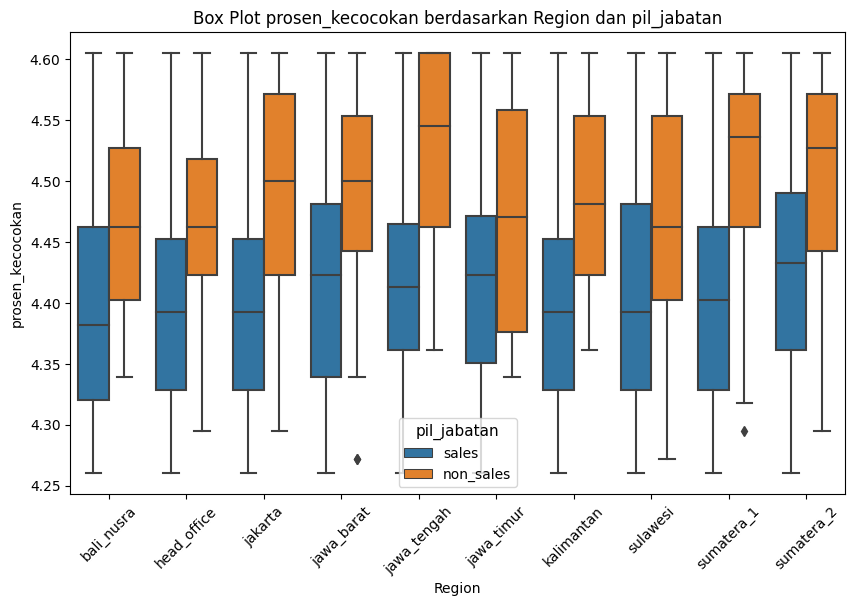

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Nilai_transformed', hue='pil_jabatan')
plt.xlabel('Region')
plt.ylabel('prosen_kecocokan')
plt.title('Box Plot prosen_kecocokan berdasarkan Region dan pil_jabatan')
plt.xticks(rotation=45)
plt.legend(title='pil_jabatan', title_fontsize='11')
plt.show()

<ipython-input-15-adbefa77624f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Region', y='prosen_kecocokan', hue='pil_jabatan', ci=None, estimator='mean')


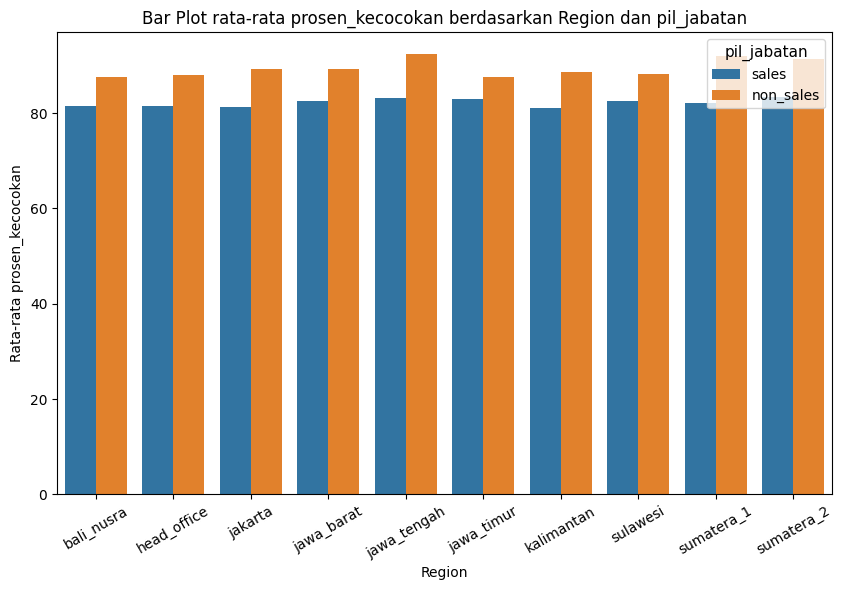

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='prosen_kecocokan', hue='pil_jabatan', ci=None, estimator='mean')
plt.xlabel('Region')
plt.ylabel('Rata-rata prosen_kecocokan')
plt.title('Bar Plot rata-rata prosen_kecocokan berdasarkan Region dan pil_jabatan')
plt.xticks(rotation=30)
plt.legend(title='pil_jabatan', title_fontsize='11')
plt.show()

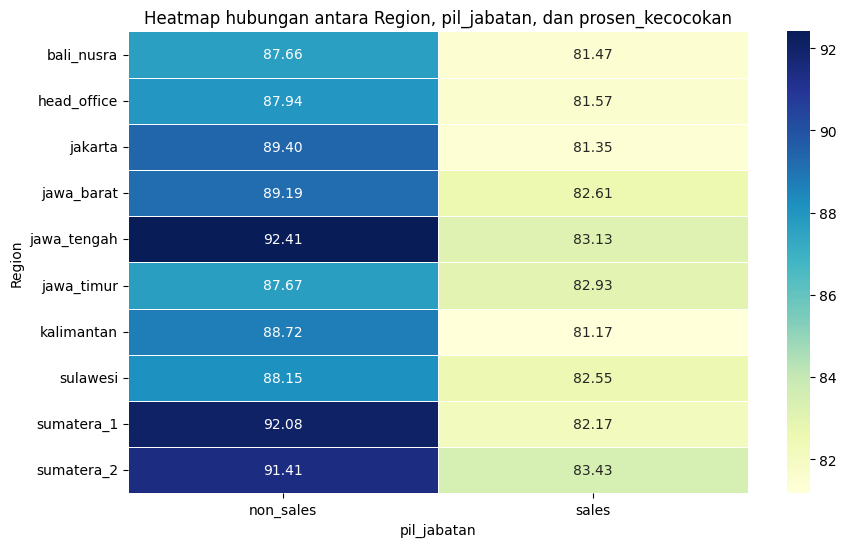

In [16]:
pivot_table = df.pivot_table(index='Region', columns='pil_jabatan', values='prosen_kecocokan', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.xlabel('pil_jabatan')
plt.ylabel('Region')
plt.title('Heatmap hubungan antara Region, pil_jabatan, dan prosen_kecocokan')
plt.show()

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Melakukan ANOVA dengan formula 'Nilai_transformed ~ Region + pil_jabatan + Region:pil_jabatan'
formula = 'Nilai_transformed ~ C(Region) + C(pil_jabatan) + C(Region):C(pil_jabatan)'
model = ols(formula, data=df).fit()
anova_result = sm.stats.anova_lm(model, typ=2)

# Tampilkan hasil analisis ANOVA
print("Hasil ANOVA:")
print(anova_result)

Hasil ANOVA:
                             sum_sq      df           F         PR(>F)
C(Region)                  0.368631     9.0    5.848135   3.815079e-08
C(pil_jabatan)             6.607256     1.0  943.385693  1.379382e-189
C(Region):C(pil_jabatan)   0.176882     9.0    2.806137   2.749248e-03
Residual                  34.241431  4889.0         NaN            NaN



Hasil analisis ANOVA menampilkan sum of squares (sum_sq), degrees of freedom (df), nilai F (F), dan nilai p (PR(>F)) untuk masing-masing faktor ('Region', 'pil_jabatan') dan interaksi keduanya ('Region:pil_jabatan').

Berikut adalah penjelasan dari hasil analisis ANOVA:

Faktor 'Region' (C(Region)):

sum_sq: 0.368631
df: 9.0
F: 5.848135
PR(>F): 3.815079e-08 (sangat kecil)
Faktor 'pil_jabatan' (C(pil_jabatan)):

sum_sq: 6.607256
df: 1.0
F: 943.385693
PR(>F): 1.379382e-189 (sangat kecil)
Interaksi antara 'Region' dan 'pil_jabatan' (C(Region):C(pil_jabatan)):

sum_sq: 0.176882
df: 9.0
F: 2.806137
PR(>F): 2.749248e-03 (sangat kecil)
Residual:

sum_sq: 34.241431
df: 4889.0
Dari hasil di atas, nilai p (PR(>F)) untuk masing-masing faktor dan interaksi sangat kecil, jauh lebih kecil dari tingkat signifikansi umum (biasanya 0.05). Hal ini menunjukkan bahwa ada perbedaan yang signifikan antara kelompok-kelompok yang diuji pada masing-masing faktor ('Region', 'pil_jabatan') dan interaksi ('Region:pil_jabatan').